# **Importing Libraries**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## **Loading the Dataset**

In [117]:
df = pd.read_csv('dataset/heart.csv')

In [118]:
df.shape

(918, 12)

In [119]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## **Data Understanding**

In [120]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [122]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [123]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [124]:
# Count of target variable (heart disease presence)
print("\nDistribution of target variable (HeartDisease):")
display(df['HeartDisease'].value_counts())
print(f"Percentage of patients with heart disease: {df['HeartDisease'].mean()*100:.2f}%")


Distribution of target variable (HeartDisease):


HeartDisease
1    508
0    410
Name: count, dtype: int64

Percentage of patients with heart disease: 55.34%


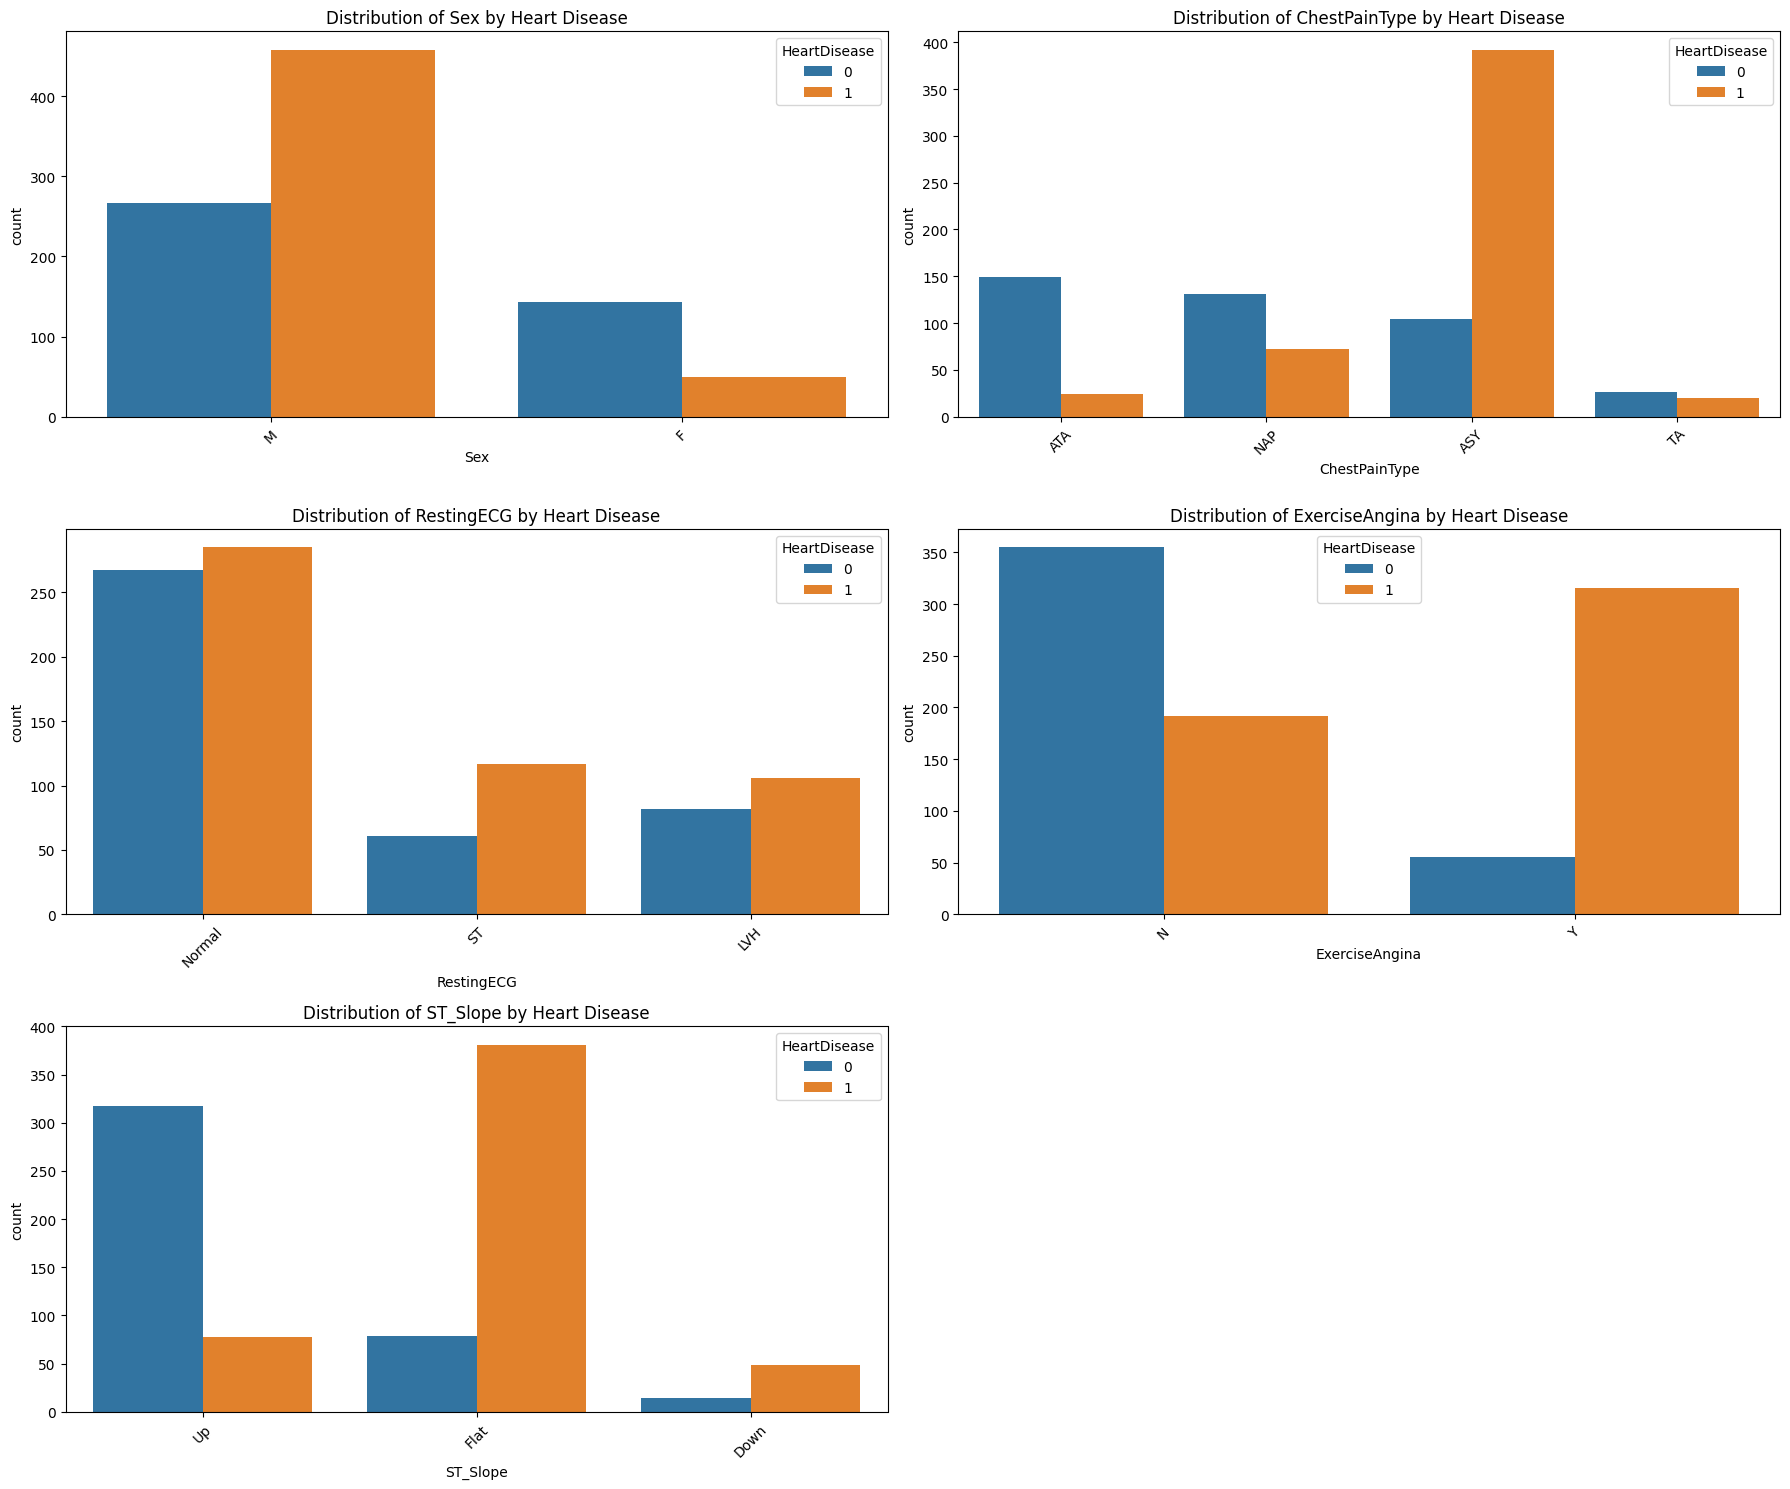

In [125]:
# Distribution of categorical variables
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=feature, data=df, hue='HeartDisease')
    plt.title(f'Distribution of {feature} by Heart Disease')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

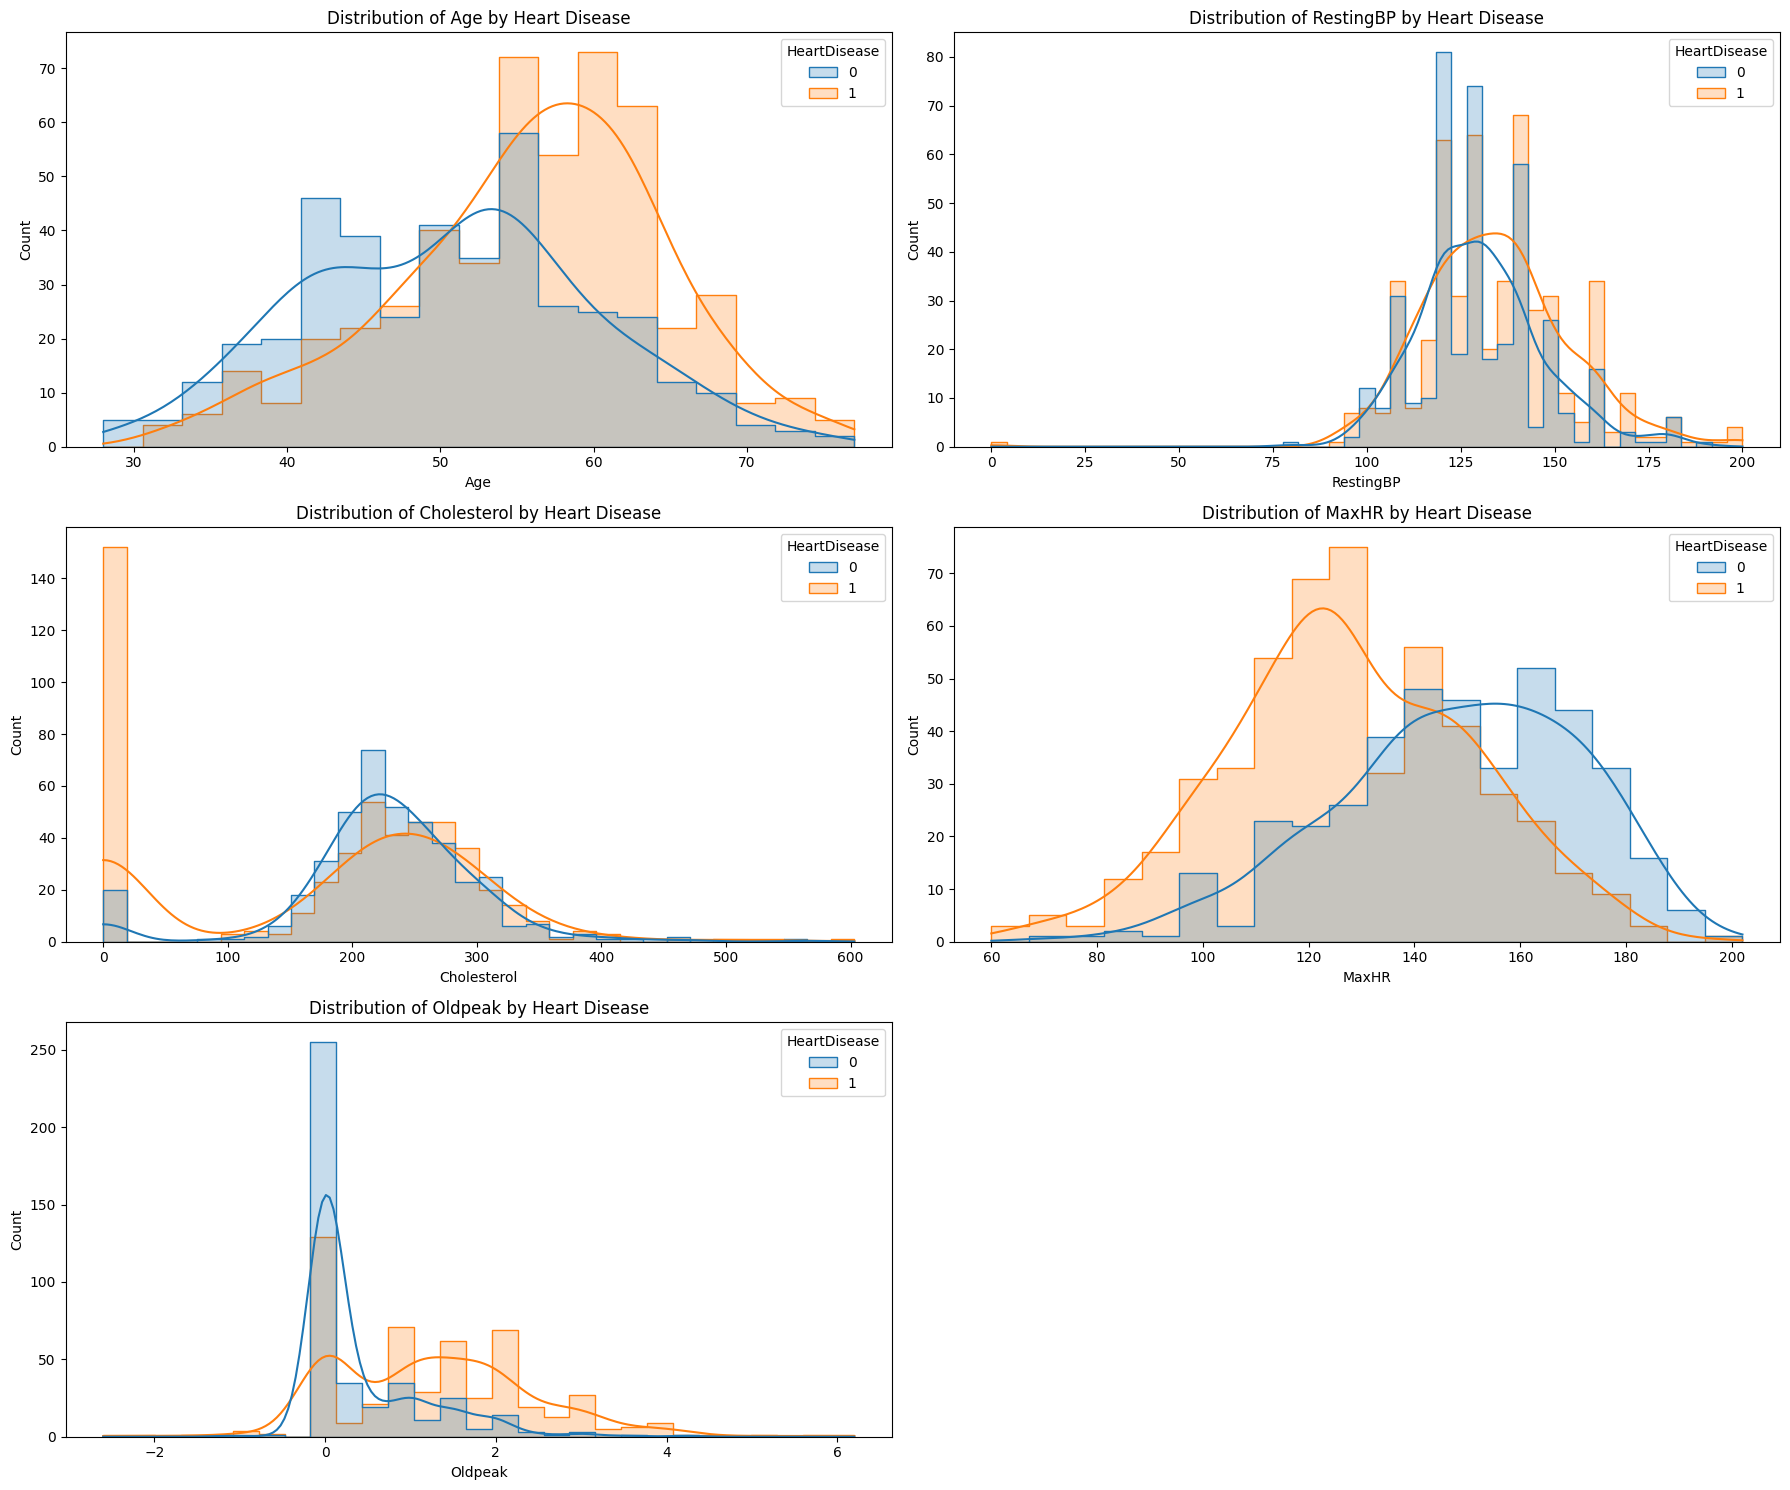

In [126]:
# Distribution of numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=feature, kde=True, hue='HeartDisease', element="step")
    plt.title(f'Distribution of {feature} by Heart Disease')
plt.tight_layout()
plt.show()


In [127]:
# Check for unusual values in Cholesterol (zero values)
print("\nPatients with Cholesterol = 0:")
display(df[df['Cholesterol'] == 0].shape[0])
print(f"Percentage of patients with Cholesterol = 0: {df[df['Cholesterol'] == 0].shape[0]/df.shape[0]*100:.2f}%")


Patients with Cholesterol = 0:


172

Percentage of patients with Cholesterol = 0: 18.74%


In [128]:
# Check for unusual values in RBP (zero values)
print("\nPatients with Resting Blood Pressure = 0:")
display(df[df['RestingBP'] == 0].shape[0])
print(f"Percentage of patients with Resting Blood Pressure = 0: {df[df['RestingBP'] == 0].shape[0]/df.shape[0]*100:.2f}%")


Patients with Resting Blood Pressure = 0:


1

Percentage of patients with Resting Blood Pressure = 0: 0.11%


In [129]:
# Check for unusual values in MaxHR (out of normal range)
print("\nPatients with MaxHR < 60 or > 220:")
display(df[(df['MaxHR'] < 60) | (df['MaxHR'] > 220)].shape[0])
print(f"Percentage of patients with abnormal MaxHR: {df[(df['MaxHR'] < 60) | (df['MaxHR'] > 220)].shape[0]/df.shape[0]*100:.2f}%")


Patients with MaxHR < 60 or > 220:


0

Percentage of patients with abnormal MaxHR: 0.00%


In [130]:
# Check for negative values in Oldpeak (negative values)
print("\nPatients with Oldpeak < 0:")
display(df[df['Oldpeak'] < 0].shape[0])
print(f"Percentage of patients with Oldpeak < 0: {df[df['Oldpeak'] < 0].shape[0]/df.shape[0]*100:.2f}%")


Patients with Oldpeak < 0:


13

Percentage of patients with Oldpeak < 0: 1.42%


In [131]:
# Check for invalid values in FastingBS (should be 0 or 1)
print("\nUnique values in FastingBS:")
display(df['FastingBS'].unique())


Unique values in FastingBS:


array([0, 1])

In [132]:
# Check for invalid values in ST_Slope (should be 'Up', 'Flat', or 'Down')
print("\nUnique values in ST_Slope:")
display(df['ST_Slope'].unique())


Unique values in ST_Slope:


array(['Up', 'Flat', 'Down'], dtype=object)

In [133]:
# Cek nilai unik, jumlah, dan persentasenya untuk ChestPainType
chest_pain_counts = df['ChestPainType'].value_counts()
chest_pain_percentage = df['ChestPainType'].value_counts(normalize=True) * 100

# Cek nilai unik, jumlah, dan persentasenya untuk RestingECG
resting_ecg_counts = df['RestingECG'].value_counts()
resting_ecg_percentage = df['RestingECG'].value_counts(normalize=True) * 100

# Gabungkan hasil dengan concat untuk menghindari NaN yang tidak relevan
result = pd.concat([
    pd.DataFrame({'Jumlah': chest_pain_counts, 'Persentase': chest_pain_percentage}),
    pd.DataFrame({'Jumlah': resting_ecg_counts, 'Persentase': resting_ecg_percentage})
], keys=['ChestPainType', 'RestingECG'])

print(result)


                      Jumlah  Persentase
ChestPainType ASY        496   54.030501
              NAP        203   22.113290
              ATA        173   18.845316
              TA          46    5.010893
RestingECG    Normal     552   60.130719
              LVH        188   20.479303
              ST         178   19.389978


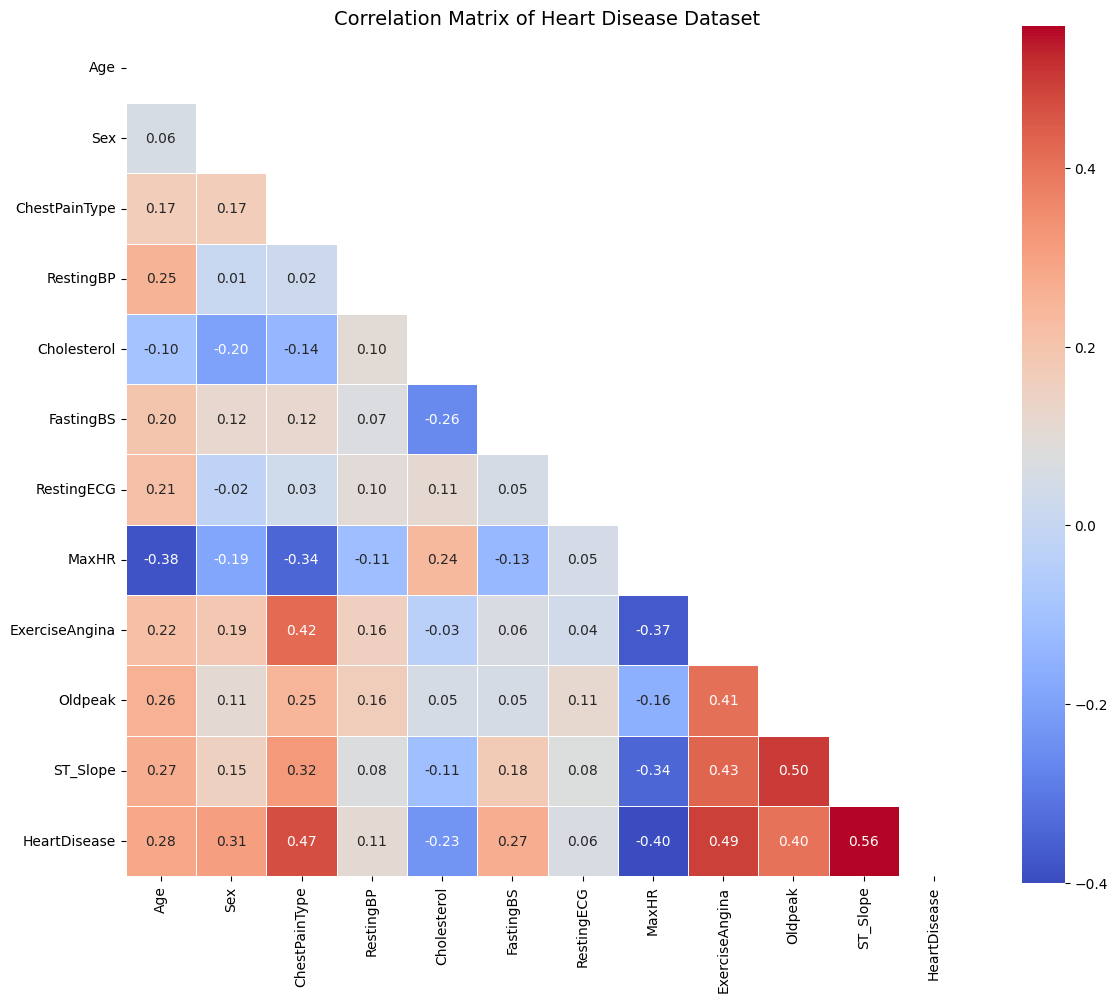


Correlation with Heart Disease (sorted):


,Correlation with HeartDisease


ST_Slope          0.558771
ExerciseAngina    0.494282
ChestPainType     0.471354
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.061011
Cholesterol      -0.232741
MaxHR            -0.400421
Name: HeartDisease, dtype: float64


In [134]:
# Prepare data for correlation matrix by encoding categorical variables
df_corr = df.copy()

# Binary categorical variables
df_corr['Sex'] = df_corr['Sex'].map({'M': 1, 'F': 0})
df_corr['ExerciseAngina'] = df_corr['ExerciseAngina'].map({'Y': 1, 'N': 0})

# For categorical variables with few categories, use label encoding
# ChestPainType: ASY (Asymptomatic) might represent the most severe condition
chest_pain_order = {'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}
df_corr['ChestPainType'] = df_corr['ChestPainType'].map(chest_pain_order)

# RestingECG: Normal (0), ST-T wave abnormality (1), LVH (2)
ecg_order = {'Normal': 0, 'ST': 1, 'LVH': 2}
df_corr['RestingECG'] = df_corr['RestingECG'].map(ecg_order)

# ST_Slope: Up (0), Flat (1), Down (2) - based on potential severity
slope_order = {'Up': 0, 'Flat': 1, 'Down': 2}
df_corr['ST_Slope'] = df_corr['ST_Slope'].map(slope_order)

# Now calculate correlation matrix with all numerical values
plt.figure(figsize=(12, 10))
correlation_matrix = df_corr.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Heart Disease Dataset', fontsize=14)
plt.tight_layout()
plt.show()

# Display the numerical correlations with the target variable (HeartDisease)
print("\nCorrelation with Heart Disease (sorted):")
target_correlations = correlation_matrix['HeartDisease'].drop('HeartDisease').sort_values(ascending=False)
display(pd.DataFrame(target_correlations, columns=['Correlation with HeartDisease']))
print(correlation_matrix['HeartDisease'].drop('HeartDisease').sort_values(ascending=False))

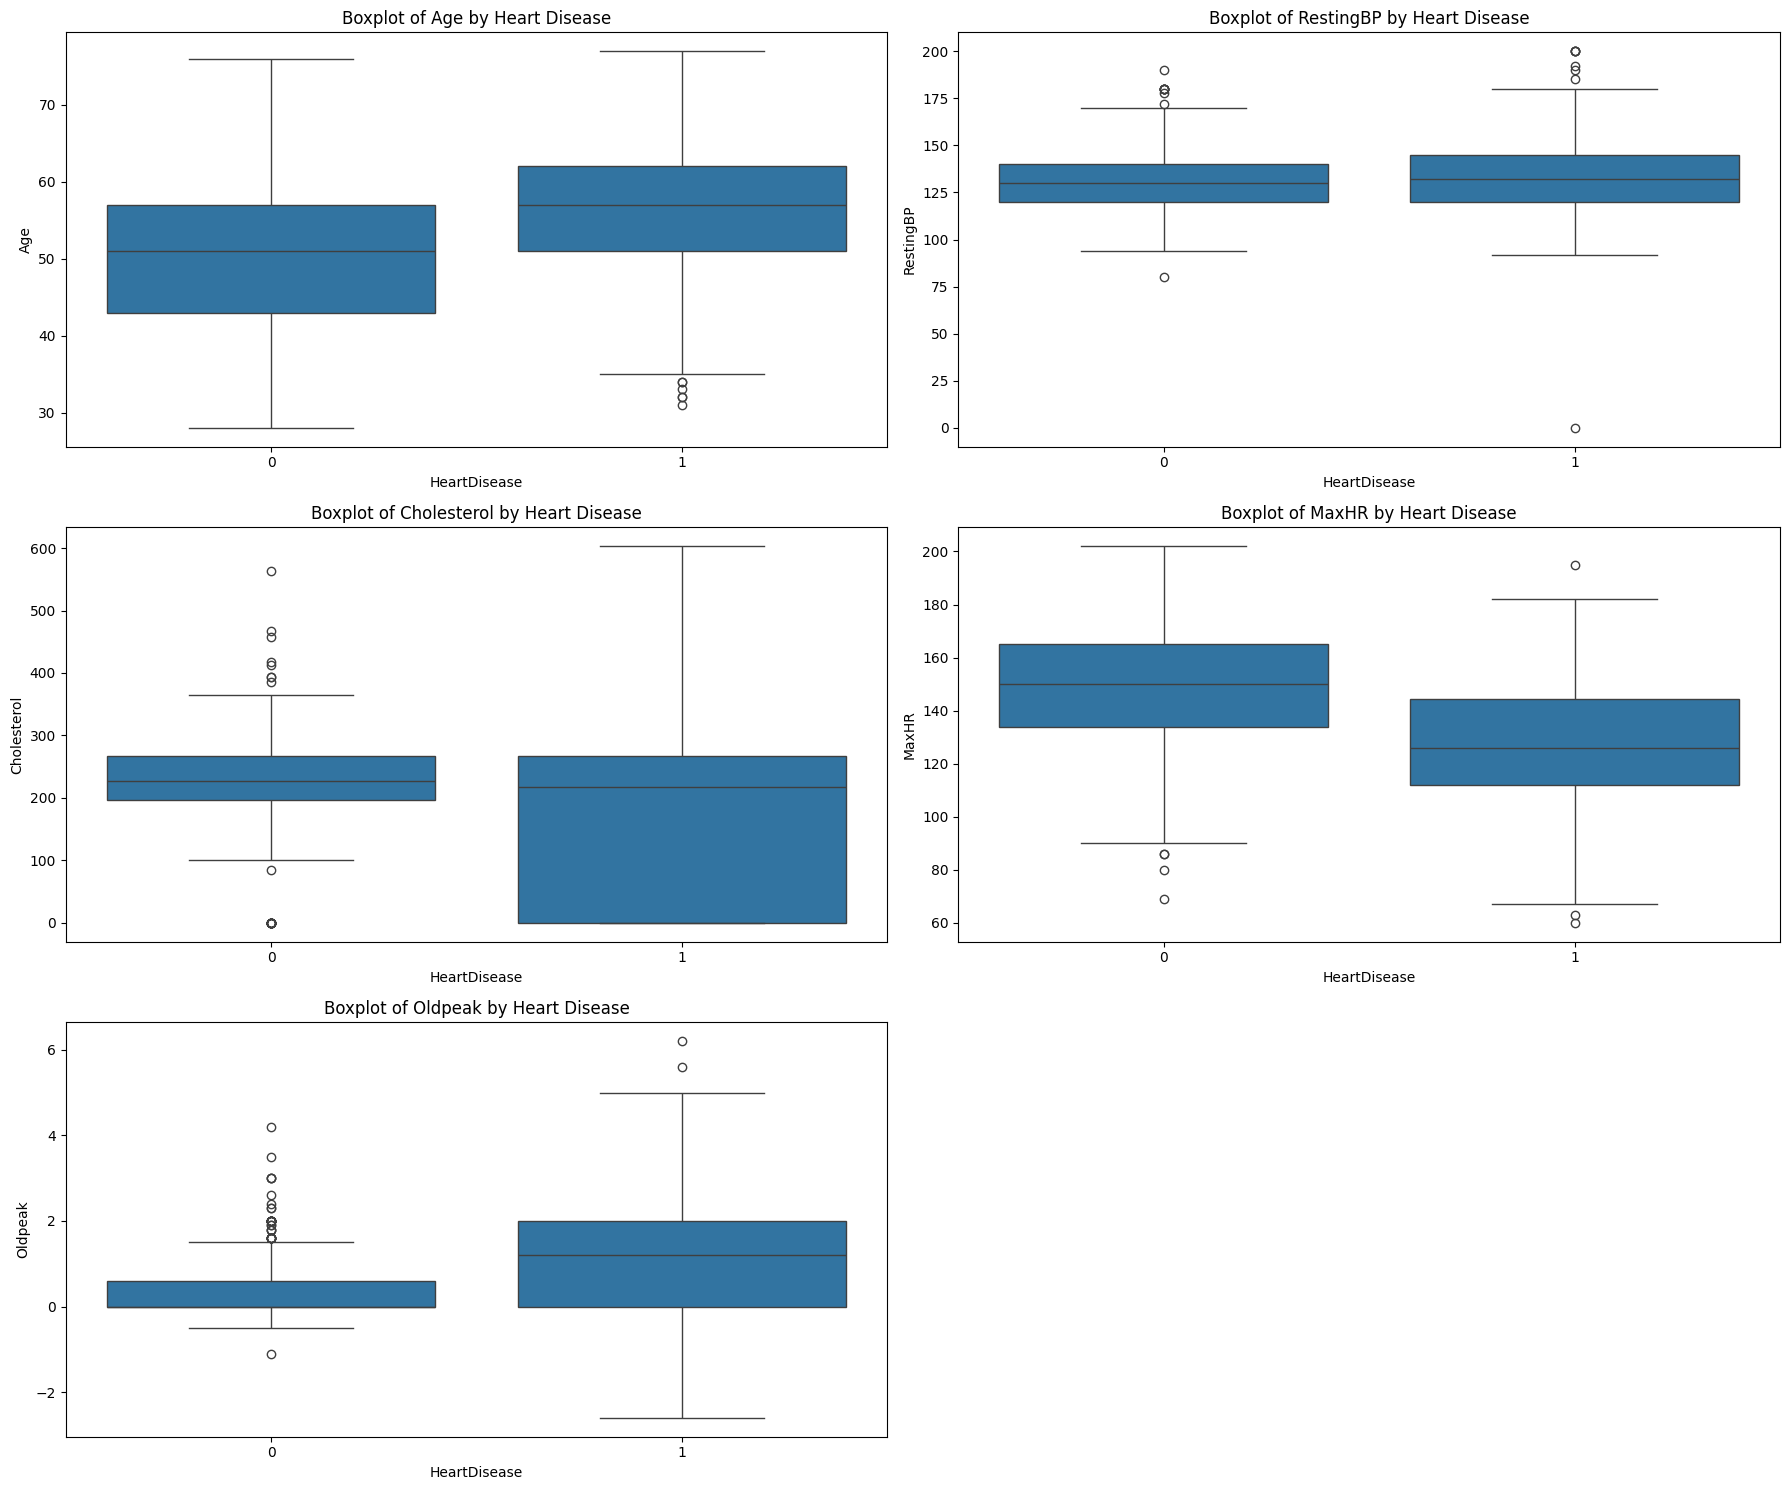

In [135]:

# Boxplots to check for outliers in numerical features
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='HeartDisease', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Heart Disease')
plt.tight_layout()
plt.show()

### Analisis Outlier per Variabel

### 1. Age (Umur)
- **Observasi:** Terdapat beberapa outlier di bawah kisaran normal pada kelompok dengan penyakit jantung (*HeartDisease=1*).  
- **Interpretasi:** Outlier ini menunjukkan pasien muda dengan penyakit jantung, yang meskipun jarang, merupakan kasus klinis yang valid.  

### 2. RestingBP (Tekanan Darah Istirahat)
- **Observasi:** Terdapat outlier di kedua kelompok, termasuk nilai rendah (~80) dan tinggi (~200).  
- **Interpretasi:** Nilai tekanan darah ekstrim dapat mencerminkan kondisi hipotensi atau hipertensi, yang merupakan faktor risiko penyakit jantung.  

### 3. Cholesterol (Kolesterol)
- **Observasi:** Beberapa outlier tinggi (>400 mg/dL) terutama pada kelompok tanpa penyakit jantung.  
- **Interpretasi:** Hiperkolesterolemia berat adalah kondisi klinis nyata dan dapat merupakan faktor risiko penyakit jantung.  

### 4. MaxHR (Detak Jantung Maksimum)
- **Observasi:** Terdapat outlier rendah (~60-70) dan tinggi (~190-200).  
- **Interpretasi:** Variabilitas detak jantung maksimum dapat dipengaruhi oleh usia, kebugaran, dan kondisi jantung yang mendasarinya.  

### 5. Oldpeak
- **Observasi:** Terdapat outlier tinggi (>4) dalam kelompok penyakit jantung dan beberapa nilai negatif.  
- **Interpretasi:** Nilai Oldpeak tinggi dan negatif dapat memiliki signifikansi klinis.  

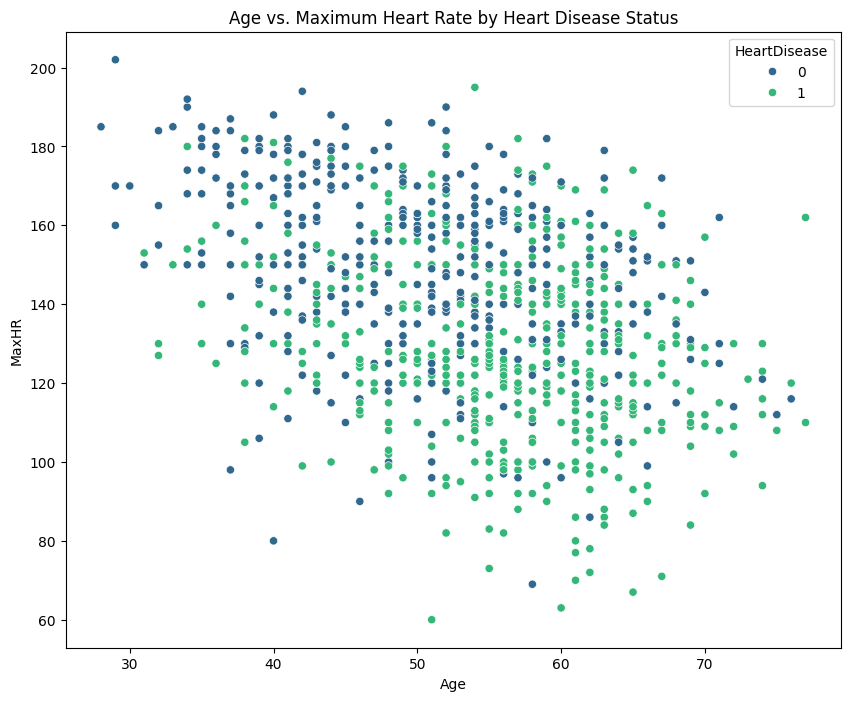

In [136]:

# Analysis of Age vs. MaxHR with Heart Disease
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', palette='viridis')
plt.title('Age vs. Maximum Heart Rate by Heart Disease Status')
plt.show()


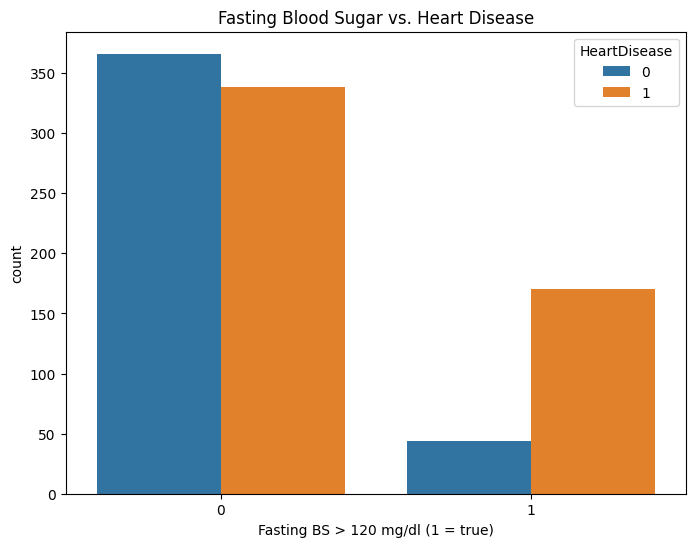

In [137]:
# Analyze FastingBS (fasting blood sugar) against Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='FastingBS', data=df, hue='HeartDisease')
plt.title('Fasting Blood Sugar vs. Heart Disease')
plt.xlabel('Fasting BS > 120 mg/dl (1 = true)')
plt.show()

<Figure size 1000x600 with 0 Axes>

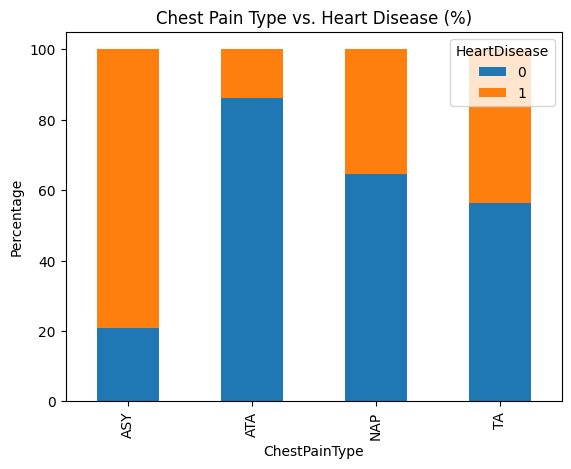

In [138]:
# Check relationship between Chest Pain Type and Heart Disease
plt.figure(figsize=(10, 6))
chest_pain_heart = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
chest_pain_heart_percent = chest_pain_heart.div(chest_pain_heart.sum(1), axis=0) * 100
chest_pain_heart_percent.plot(kind='bar', stacked=True)
plt.title('Chest Pain Type vs. Heart Disease (%)')
plt.ylabel('Percentage')
plt.show()

<Figure size 1200x800 with 0 Axes>

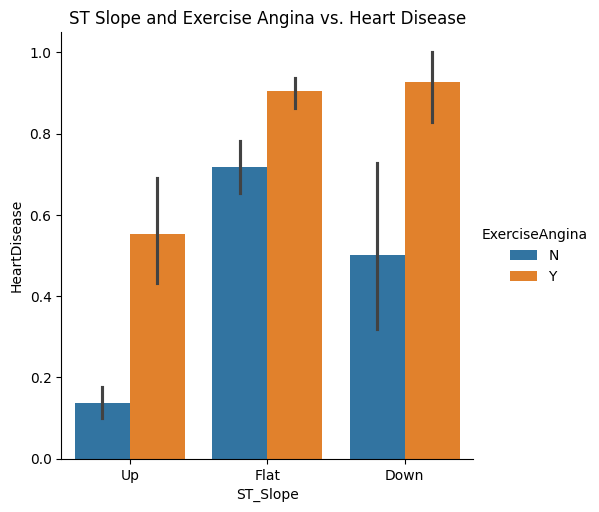

In [139]:
# Looking for patterns in ExerciseAngina and ST_Slope together
plt.figure(figsize=(12, 8))
sns.catplot(x='ST_Slope', y='HeartDisease', hue='ExerciseAngina', kind='bar', data=df)
plt.title('ST Slope and Exercise Angina vs. Heart Disease')
plt.show()

## **Data Preprocessing**

### **Handle Abnormal Values**

Statistik Kolesterol (tidak termasuk nilai nol):
Min: 85, Maks: 603
Mean: 244.64, Median: 237.00
Persentil ke-25: 207.25, Persentil ke-75: 275.00

Mengimputasi 172 nilai kolesterol...


/tmp/ipykernel_10374/2698968395.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '221.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[idx, 'Cholesterol'] = nilai_imputasi


Nilai kolesterol nol setelah imputasi: 0


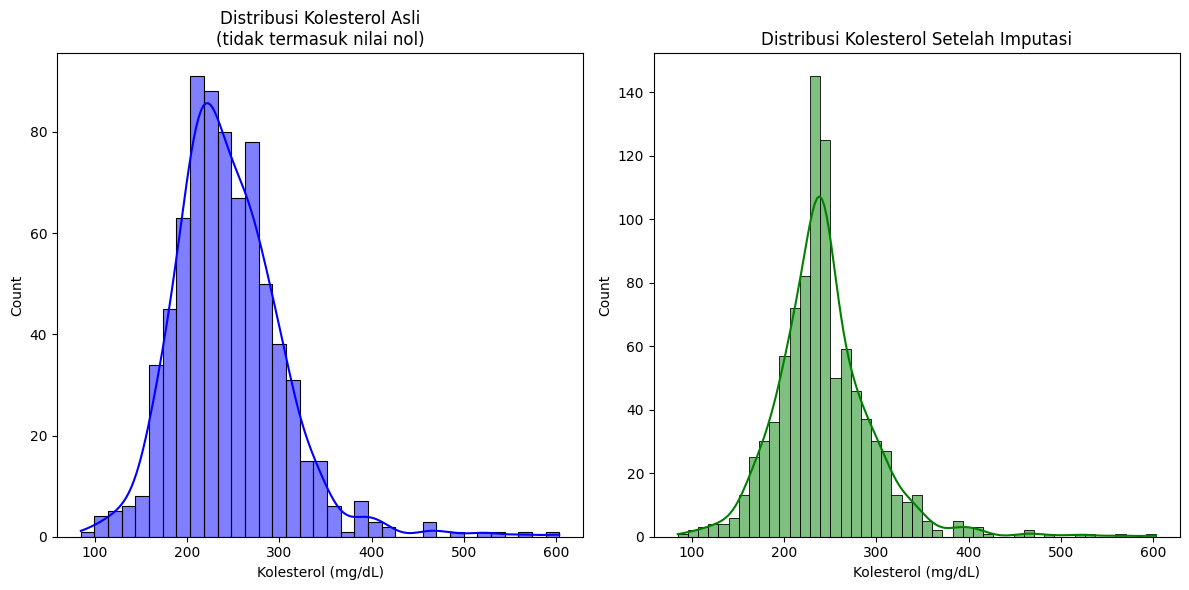

,Sebelum Imputasi (tdk termasuk nol),Setelah Imputasi
count,746.000000,918.000000
mean,244.635389,243.924292
std,59.153524,53.505404
min,85.000000,85.000000
25%,207.250000,214.000000
50%,237.000000,239.000000
75%,275.000000,268.000000
max,603.000000,603.000000


In [140]:
# Pertama, mari kita periksa distribusi nilai kolesterol saat ini (tidak termasuk nol)
valid_chol = df[df['Cholesterol'] > 0]['Cholesterol']
print(f"Statistik Kolesterol (tidak termasuk nilai nol):")
print(f"Min: {valid_chol.min()}, Maks: {valid_chol.max()}")
print(f"Mean: {valid_chol.mean():.2f}, Median: {valid_chol.median():.2f}")
print(f"Persentil ke-25: {valid_chol.quantile(0.25):.2f}, Persentil ke-75: {valid_chol.quantile(0.75):.2f}")

# Buat salinan dataframe untuk menghindari modifikasi aslinya
df_cleaned = df.copy()

# Buat kelompok umur untuk stratifikasi
df_cleaned['KelompokUmur'] = pd.cut(df_cleaned['Age'], bins=[0, 40, 50, 60, 100], 
                              labels=['<40', '40-50', '50-60', '>60'])

# Definisikan fungsi untuk menghitung median terstratifikasi untuk grup tertentu
def dapatkan_median_terstratifikasi(kelompok_umur, jenis_kelamin, penyakit_jantung):
    mask = ((df_cleaned['KelompokUmur'] == kelompok_umur) & 
            (df_cleaned['Sex'] == jenis_kelamin) & 
            (df_cleaned['HeartDisease'] == penyakit_jantung) & 
            (df_cleaned['Cholesterol'] > 0))
    
    nilai_chol = df_cleaned.loc[mask, 'Cholesterol']
    
    # Jika kita memiliki cukup data dalam stratum, gunakan mediannya
    if len(nilai_chol) >= 5:
        return nilai_chol.median()
    
    # Jika tidak cukup data dalam stratum spesifik, coba kelompok yang lebih luas
    mask_lebih_luas = ((df_cleaned['KelompokUmur'] == kelompok_umur) & 
                    (df_cleaned['Sex'] == jenis_kelamin) & 
                    (df_cleaned['Cholesterol'] > 0))
    
    chol_lebih_luas = df_cleaned.loc[mask_lebih_luas, 'Cholesterol']
    
    if len(chol_lebih_luas) >= 5:
        return chol_lebih_luas.median()
    
    # Jika masih tidak cukup, gunakan median global
    return valid_chol.median()

# Ganti nilai kolesterol nol dengan median terstratifikasi
zero_chol_mask = df_cleaned['Cholesterol'] == 0
zero_chol_indices = df_cleaned[zero_chol_mask].index

print(f"\nMengimputasi {len(zero_chol_indices)} nilai kolesterol...")

for idx in zero_chol_indices:
    kelompok_umur = df_cleaned.loc[idx, 'KelompokUmur']
    jenis_kelamin = df_cleaned.loc[idx, 'Sex']
    penyakit_jantung = df_cleaned.loc[idx, 'HeartDisease']
    
    # Dapatkan median terstratifikasi untuk grup ini
    nilai_imputasi = dapatkan_median_terstratifikasi(kelompok_umur, jenis_kelamin, penyakit_jantung)
    
    # Ganti nilai nol dengan median yang dihitung
    df_cleaned.loc[idx, 'Cholesterol'] = nilai_imputasi

# Hapus kolom kelompok umur sementara karena kita tidak lagi membutuhkannya
df_cleaned.drop('KelompokUmur', axis=1, inplace=True)

# Verifikasi imputasi
print(f"Nilai kolesterol nol setelah imputasi: {(df_cleaned['Cholesterol'] == 0).sum()}")

# Visualisasikan distribusi kolesterol sebelum dan sesudah imputasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(valid_chol, kde=True, color='blue')
plt.title('Distribusi Kolesterol Asli\n(tidak termasuk nilai nol)')
plt.xlabel('Kolesterol (mg/dL)')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Cholesterol'], kde=True, color='green')
plt.title('Distribusi Kolesterol Setelah Imputasi')
plt.xlabel('Kolesterol (mg/dL)')

plt.tight_layout()
plt.show()

# Bandingkan statistik ringkasan sebelum dan sesudah imputasi
perbandingan_kolesterol = pd.DataFrame({
    'Sebelum Imputasi (tdk termasuk nol)': valid_chol.describe(),
    'Setelah Imputasi': df_cleaned['Cholesterol'].describe()
})
display(perbandingan_kolesterol)

Berikut ringkasan yang lebih singkat untuk markdown Anda:  

**Penanganan Data Hilang pada Kolom Kolesterol**  

Nilai kolesterol 0 mg/dL secara biologis tidak mungkin terjadi pada manusia, sehingga nilai ini kemungkinan besar merepresentasikan data hilang yang dikodekan sebagai nol. Oleh karena itu, pendekatan yang direkomendasikan adalah **imputasi median terstratifikasi** berdasarkan **usia, jenis kelamin, dan status penyakit jantung**.  

**Alasan Pendekatan Ini:**  
- **Median lebih tahan terhadap outlier** dibandingkan mean.  
- **Stratifikasi meningkatkan akurasi** karena kadar kolesterol dipengaruhi oleh usia, jenis kelamin, dan status penyakit.  
- **Mempertahankan semua data**, relevan secara fisiologis, dan lebih transparan dalam proses imputasi.

### **Outliers Management**

## Metode Penanganan Outlier: Capping dengan IQR Termodifikasi  

Pendekatan **capping IQR termodifikasi** direkomendasikan untuk menangani outlier tanpa menghilangkan informasi klinis yang berharga. Metode ini membatasi nilai ekstrim dengan multiplier lebih konservatif (**2.5×IQR**), memastikan keseimbangan antara **preservasi informasi medis** dan **reduksi distorsi statistik**.  

### Pertimbangan Per Variabel:  
- **Age**: Menggunakan batas yang lebih longgar karena variasi umur yang luas masih relevan klinis.  
- **RestingBP**: Capping mengontrol nilai ekstrim tanpa menghilangkan indikasi hipotensi/hipertensi.  
- **Cholesterol**: Menjaga nilai tinggi dari hiperkolesterolemia parah, tetapi membatasi dominasi outlier.  
- **MaxHR**: Mempertahankan variasi alami detak jantung tanpa pengaruh berlebihan dari outlier.  
- **Oldpeak**: Mempertahankan nilai negatif karena relevansi klinis, tetapi membatasi ekstremitas.  

Pendekatan ini memastikan **akurasi dan generalisasi** model tanpa mengabaikan outlier yang bermakna secara klinis.  

In [141]:
# Fungsi untuk penanganan outlier dengan metode capping berdasarkan IQR termodifikasi
def handle_outliers_with_modified_iqr(df, column, multiplier=2.5):
    """
    Menangani outlier dalam kolom numerik menggunakan pendekatan IQR termodifikasi.
    
    Parameters:
    df (DataFrame): DataFrame yang berisi data
    column (str): Nama kolom yang akan ditangani outliernya
    multiplier (float): Pengali untuk IQR, 2.5 lebih konservatif daripada 1.5 standar
    
    Returns:
    Series: Seri dengan outlier yang sudah ditangani melalui capping
    """
    # Buat salinan data untuk tidak memodifikasi data asli
    data = df[column].copy()
    
    # Hitung Q1, Q3, dan IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Hitung batas bawah dan atas
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Memastikan batas bawah tidak negatif untuk variabel yang tidak boleh negatif
    if column in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']:
        lower_bound = max(0, lower_bound)
    
    # Spesial untuk Oldpeak: izinkan nilai negatif karena valid secara medis
    
    # Lakukan capping (pembatasan)
    data_capped = data.copy()
    data_capped[data < lower_bound] = lower_bound
    data_capped[data > upper_bound] = upper_bound
    
    # Bandingkan sebelum dan sesudah capping
    print(f"Outlier pada kolom {column}:")
    print(f"- Jumlah sebelum capping: {sum((data < lower_bound) | (data > upper_bound))}")
    print(f"- Persentase data yang terpengaruh: {sum((data < lower_bound) | (data > upper_bound))/len(data)*100:.2f}%")
    print(f"- Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")
    
    return data_capped

In [142]:
df_cleaned['Cholesterol'].describe()

count    918.000000
mean     243.924292
std       53.505404
min       85.000000
25%      214.000000
50%      239.000000
75%      268.000000
max      603.000000
Name: Cholesterol, dtype: float64

Outlier pada kolom Age:
- Jumlah sebelum capping: 0
- Persentase data yang terpengaruh: 0.00%
- Batas bawah: 14.50, Batas atas: 92.50
Outlier pada kolom RestingBP:
- Jumlah sebelum capping: 6
- Persentase data yang terpengaruh: 0.65%
- Batas bawah: 70.00, Batas atas: 190.00
Outlier pada kolom Cholesterol:
- Jumlah sebelum capping: 13
- Persentase data yang terpengaruh: 1.42%
- Batas bawah: 79.00, Batas atas: 403.00
Outlier pada kolom MaxHR:
- Jumlah sebelum capping: 0
- Persentase data yang terpengaruh: 0.00%
- Batas bawah: 30.00, Batas atas: 246.00
Outlier pada kolom Oldpeak:
- Jumlah sebelum capping: 2
- Persentase data yang terpengaruh: 0.22%
- Batas bawah: -3.75, Batas atas: 5.25


/tmp/ipykernel_10374/1076829858.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)
/tmp/ipykernel_10374/1076829858.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)
/tmp/ipykernel_10374/1076829858.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)
/tmp/ipykernel_10374/1076829858.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labe

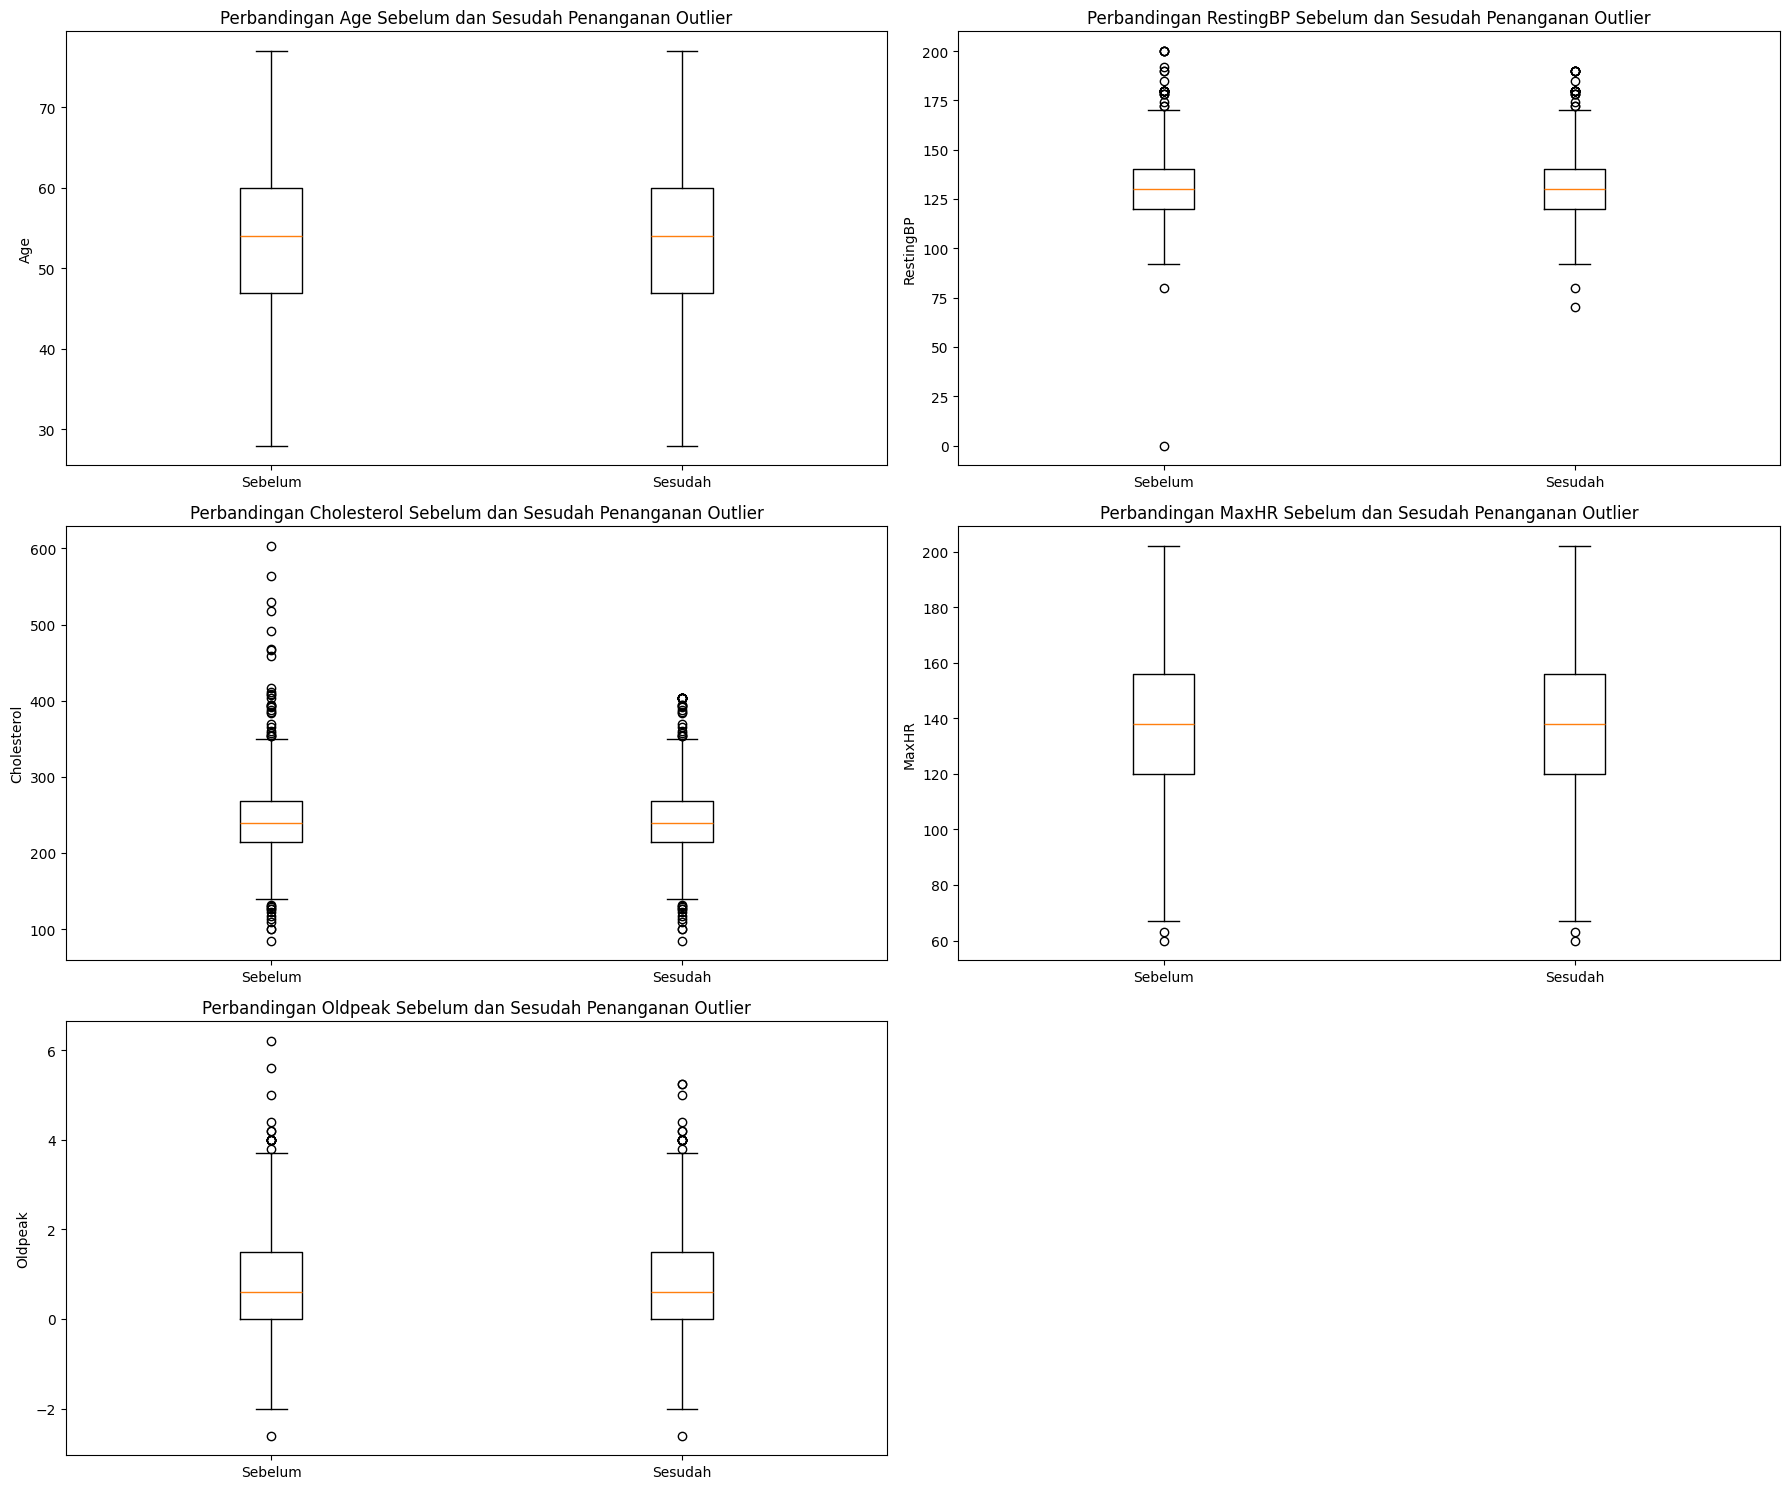

In [143]:
df_no_outliers = df_cleaned.copy()

numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for column in numerical_columns:
    df_no_outliers[column] = handle_outliers_with_modified_iqr(df_cleaned, column)

# Visualisasikan perbandingan sebelum dan sesudah penanganan outlier
plt.figure(figsize=(18, 15))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i+1)
    
    # Plot boxplot sebelum dan sesudah penanganan
    boxplot_data = [df_cleaned[column], df_no_outliers[column]]
    labels = ['Sebelum', 'Sesudah']
    
    plt.boxplot(boxplot_data, labels=labels)
    plt.title(f'Perbandingan {column} Sebelum dan Sesudah Penanganan Outlier')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Interpretasi Penanganan Outlier dengan Capping IQR Termodifikasi  

Metode **capping dengan IQR termodifikasi (2.5×IQR)** digunakan untuk menangani outlier pada dataset. Pendekatan ini membatasi nilai ekstrim tetapi tetap mempertahankan informasi tentang arah dan keberadaan outlier.  

### **Perbandingan Sebelum dan Sesudah Penanganan Outlier:**  
Dari boxplot, terlihat bahwa distribusi data mengalami perubahan setelah diterapkan metode capping, terutama pada variabel dengan nilai ekstrim yang tinggi.  

### **Analisis Per Variabel:**  
1. **Age (Umur)**  
   - Sebagian besar nilai tetap sama, menunjukkan bahwa variabilitas umur dalam dataset masih dalam batas wajar.  
   - Tidak ada pengaruh besar karena distribusi umur relatif normal.  

2. **RestingBP (Tekanan Darah Istirahat)**  
   - Beberapa nilai outlier tinggi dan rendah telah dikurangi.  
   - Tekanan darah yang terlalu tinggi atau terlalu rendah masih diperhitungkan karena relevan secara klinis.  

3. **Cholesterol (Kolesterol)**  
   - Outlier tinggi (>400 mg/dL) telah dikurangi secara signifikan.  
   - Ini membantu menjaga distribusi data tetap representatif tanpa menghapus kemungkinan kondisi hiperkolesterolemia.  

4. **MaxHR (Detak Jantung Maksimum)**  
   - Variasi detak jantung tetap terjaga, tetapi nilai ekstrim telah dibatasi.  
   - Ini memastikan bahwa model tetap mempertimbangkan keberadaan nilai ekstrim tanpa terpengaruh secara berlebihan.  

5. **Oldpeak**  
   - Nilai negatif tetap dipertahankan karena memiliki signifikansi klinis.  
   - Nilai yang sangat tinggi (>4) telah dikurangi untuk menghindari distorsi dalam analisis lebih lanjut.  

### **Kesimpulan**  
- **Metode capping IQR termodifikasi efektif dalam mengurangi dampak outlier tanpa kehilangan informasi medis penting.**  
- **Distribusi data tetap representatif**, yang memastikan model machine learning dapat menangkap pola yang sebenarnya tanpa dipengaruhi oleh nilai ekstrim.  
- Pendekatan ini memberikan **keseimbangan antara akurasi dan generalisasi model**, khususnya dalam analisis data medis yang sering mengandung kasus klinis langka.  

## **Categorical Features Encoding**

In [144]:
# Binary encoding untuk Sex
df_no_outliers['Sex_Encoded'] = df_no_outliers['Sex'].map({'M': 1, 'F': 0})

# One-Hot Encoding untuk ChestPainType
chest_pain_encoded = pd.get_dummies(df_no_outliers['ChestPainType'], prefix='ChestPain')

# Ordinal Encoding untuk RestingECG (revisi)
df_no_outliers['RestingECG_Encoded'] = df_no_outliers['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})

# Binary encoding untuk ExerciseAngina
df_no_outliers['ExerciseAngina_Encoded'] = df_no_outliers['ExerciseAngina'].map({'Y': 1, 'N': 0})

# Ordinal Encoding untuk ST_Slope
df_no_outliers['ST_Slope_Encoded'] = df_no_outliers['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# Gabungkan hasil encoding (kecuali RestingECG yang sekarang menggunakan ordinal encoding)
df_no_outliers_encoded = pd.concat([df_no_outliers, chest_pain_encoded], axis=1)

# Hapus kolom asli jika diinginkan
columns_to_drop = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_no_outliers_encoded = df_no_outliers_encoded.drop(columns=columns_to_drop)

df_no_outliers_encoded['HeartDisease'] = df_no_outliers_encoded.pop('HeartDisease')

In [145]:
df_no_outliers_encoded.to_csv('df_encoded.csv', index=False)

# Pemilihan Metode Encoding Optimal untuk Dataset Penyakit Jantung

### 1. Sex (Jenis Kelamin) - **Binary Encoding**
- Variabel biner (M/F) lebih sederhana dan efisien.
- Memudahkan interpretasi dalam model prediktif.

### 2. ChestPainType (Tipe Nyeri Dada) - **One-Hot Encoding**
- Memiliki 4 kategori unik tanpa urutan alami.
- Setiap kategori memiliki kontribusi diagnostik berbeda.
- Pola distribusi yang sangat berbeda untuk setiap kategori memperkuat bahwa One-Hot Encoding adalah pilihan tepat
- Sangat penting untuk memisahkan kategori ASY dari yang lain karena sangat prediktif terhadap HeartDisease

### 3. RestingECG (Hasil EKG Istirahat) - **Ordinal Encoding**
- Risiko meningkat secara bertahap dari Normal → ST → LVH.
- Encoding ordinal mempertahankan urutan ini.

### 4. ExerciseAngina (Angina Akibat Latihan) - **Binary Encoding**
- Variabel biner dengan pengaruh signifikan terhadap risiko penyakit jantung.
- Encoding biner mencerminkan adanya faktor risiko.

### 5. ST_Slope (Kemiringan Segmen ST) - **Ordinal Encoding**
- Pola risiko meningkat dari Up → Flat → Down.
- Encoding ordinal menjaga informasi tingkatan risiko.

### Kesimpulan
Pendekatan ini mengoptimalkan keseimbangan antara efisiensi komputasional dan retensi informasi penting, serta mempertimbangkan hubungan medis antar variabel.


## **Feature Scaling / Normalization**

In [146]:
for i in numerical_columns:
    print(f"Deskripsi untuk {i}:\n{df_no_outliers_encoded[i].describe()}\n")

Deskripsi untuk Age:
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

Deskripsi untuk RestingBP:
count    918.000000
mean     132.427015
std       17.949542
min       70.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      190.000000
Name: RestingBP, dtype: float64

Deskripsi untuk Cholesterol:
count    918.000000
mean     242.936275
std       49.218971
min       85.000000
25%      214.000000
50%      239.000000
75%      268.000000
max      403.000000
Name: Cholesterol, dtype: float64

Deskripsi untuk MaxHR:
count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Deskripsi untuk Oldpeak:
count    918.000000
mean       0.885948
std        1.060228
min       -2.600000
25%        0.000000
50%        

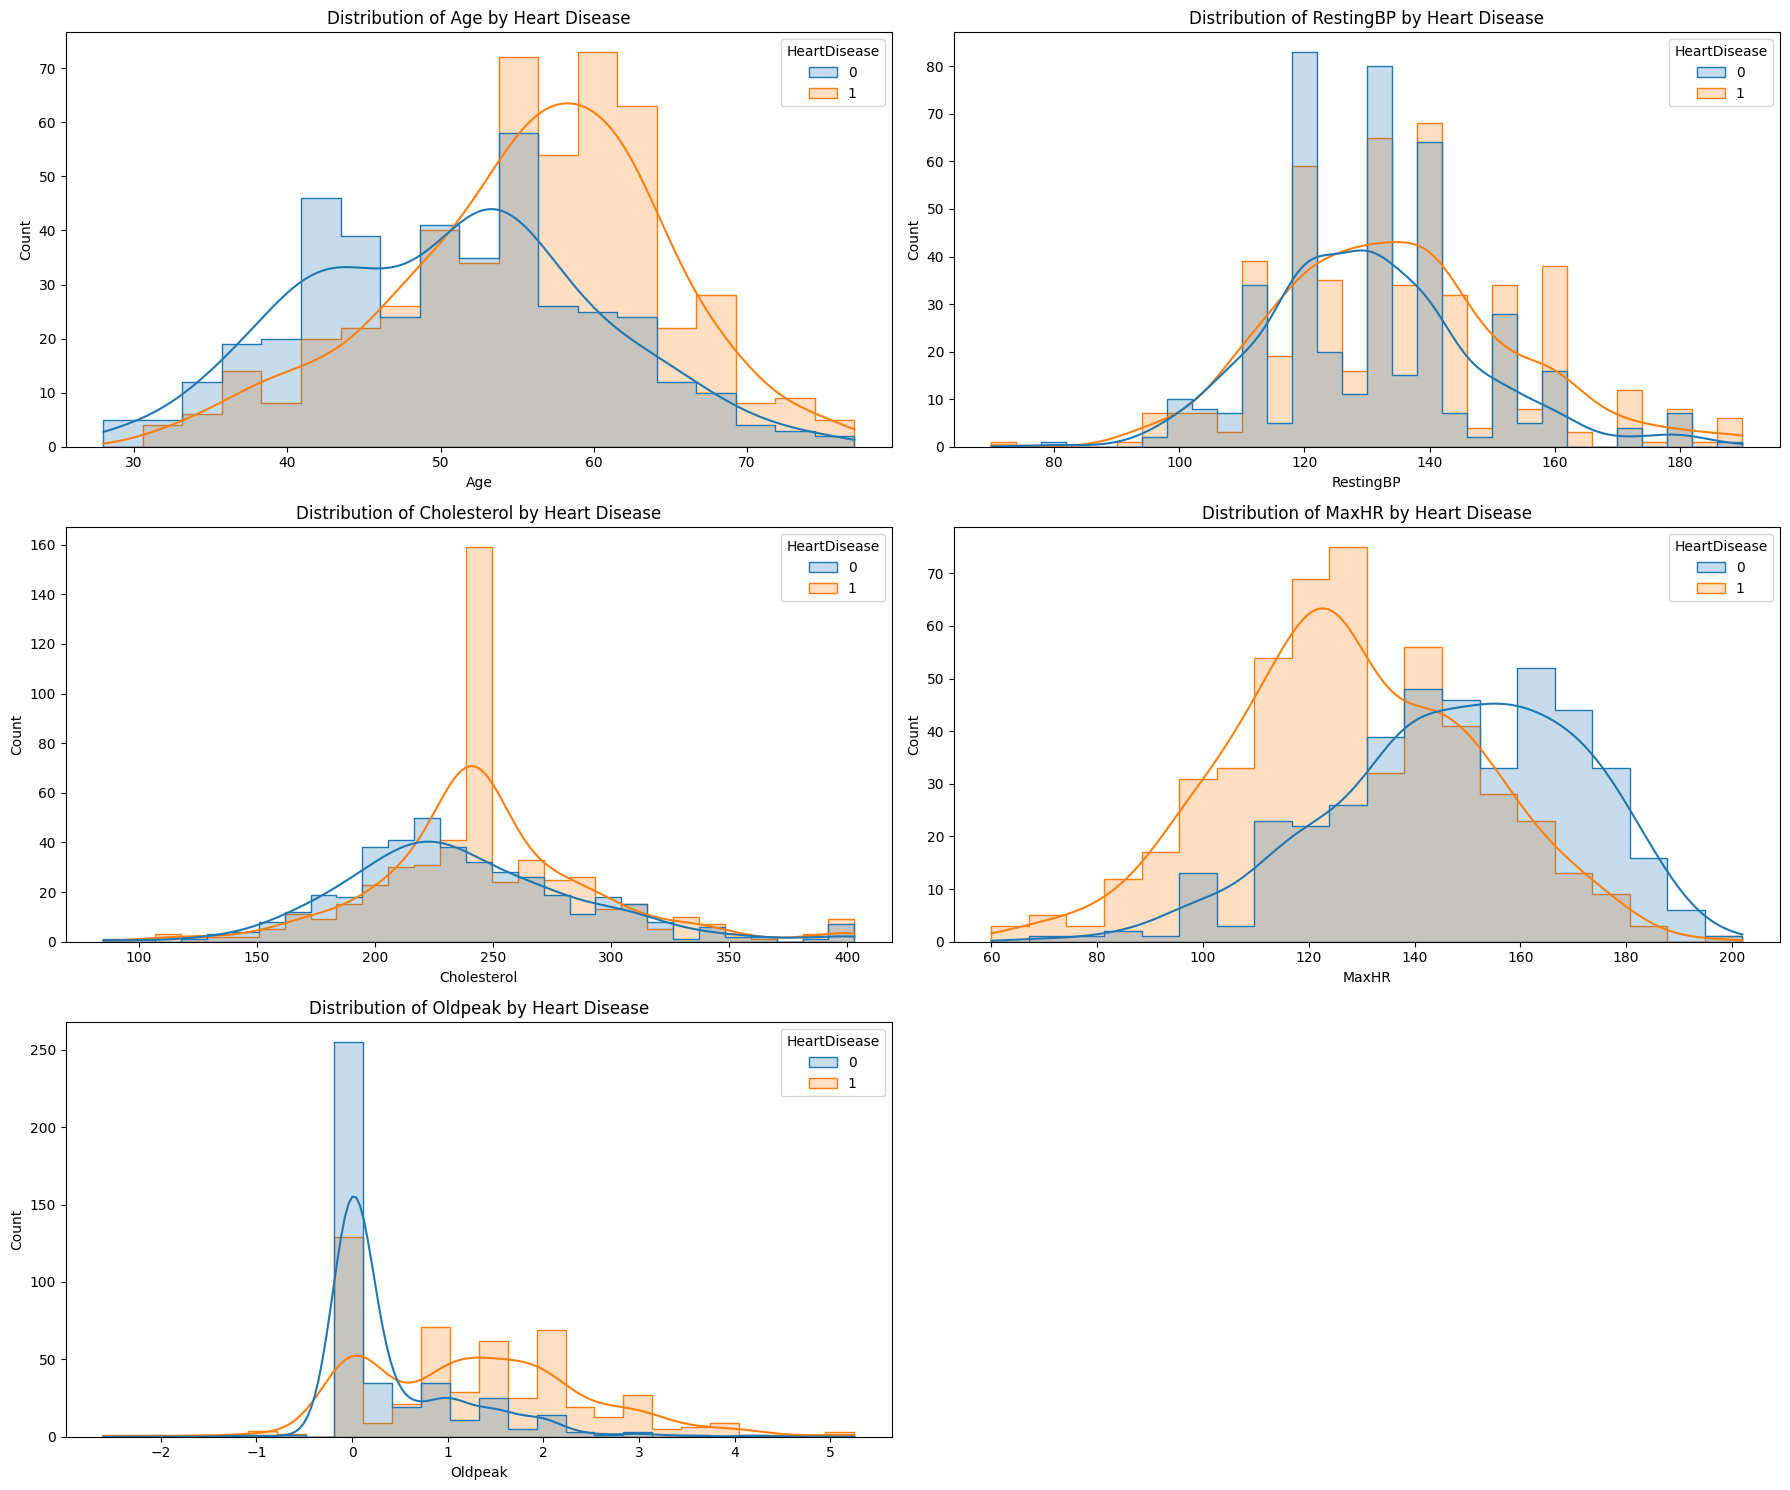

In [147]:

plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df_no_outliers_encoded, x=feature, kde=True, hue='HeartDisease', element="step")
    plt.title(f'Distribution of {feature} by Heart Disease')
plt.tight_layout()
plt.show()

In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan df adalah dataframe yang sudah di-preprocess sebelumnya
# (penanganan missing values, outliers, dan encoding kategorikal sudah dilakukan)

# Strategi scaling yang berbeda untuk fitur yang berbeda
def optimal_scaling(df):
    """
    Menerapkan metode scaling optimal untuk setiap fitur numerik
    berdasarkan karakteristik distribusinya
    """
    # Buat salinan dataframe
    scaled_df = df.copy()
    
    # 1. Age - StandardScaler karena distribusi mendekati normal
    age_scaler = StandardScaler()
    scaled_df['Age'] = age_scaler.fit_transform(df[['Age']])
    
    # 2. RestingBP - StandardScaler karena distribusi cukup simetris
    bp_scaler = StandardScaler()
    scaled_df['RestingBP'] = bp_scaler.fit_transform(df[['RestingBP']])
    
    # 3. Cholesterol - RobustScaler karena ada spike yang besar (outlier)
    chol_scaler = RobustScaler()
    scaled_df['Cholesterol'] = chol_scaler.fit_transform(df[['Cholesterol']])
    
    # 4. MaxHR - StandardScaler karena distribusi bimodal tapi cukup seimbang
    hr_scaler = StandardScaler()
    scaled_df['MaxHR'] = hr_scaler.fit_transform(df[['MaxHR']])
    
    # 5. Oldpeak - PowerTransformer (Yeo-Johnson) untuk mengatasi skewness
    oldpeak_scaler = PowerTransformer(method='yeo-johnson')
    scaled_df['Oldpeak'] = oldpeak_scaler.fit_transform(df[['Oldpeak']])
    
    return scaled_df, {
        'Age': age_scaler,
        'RestingBP': bp_scaler,
        'Cholesterol': chol_scaler,
        'MaxHR': hr_scaler,
        'Oldpeak': oldpeak_scaler
    }

In [153]:
# Function untuk visualisasi perbandingan distribusi sebelum dan sesudah scaling
def visualize_scaling_comparison(original_df, scaled_df):
    """
    Visualisasi perbandingan distribusi sebelum dan sesudah scaling
    """
    numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    
    for feature in numeric_features:
        plt.figure(figsize=(18, 8))
        
        # Distribusi asli
        plt.subplot(1, 2, 1)
        sns.histplot(data=original_df, x=feature, hue='HeartDisease', kde=True, common_norm=False)
        plt.title(f'Original Distribution of {feature}')
        
        # Distribusi setelah scaling
        plt.subplot(1, 2, 2)
        sns.histplot(data=scaled_df, x=feature, hue='HeartDisease', kde=True, common_norm=False)
        plt.title(f'Scaled Distribution of {feature}')
        
        plt.tight_layout()
        plt.show()

In [150]:
scaled_df, scalers = optimal_scaling(df_no_outliers_encoded)

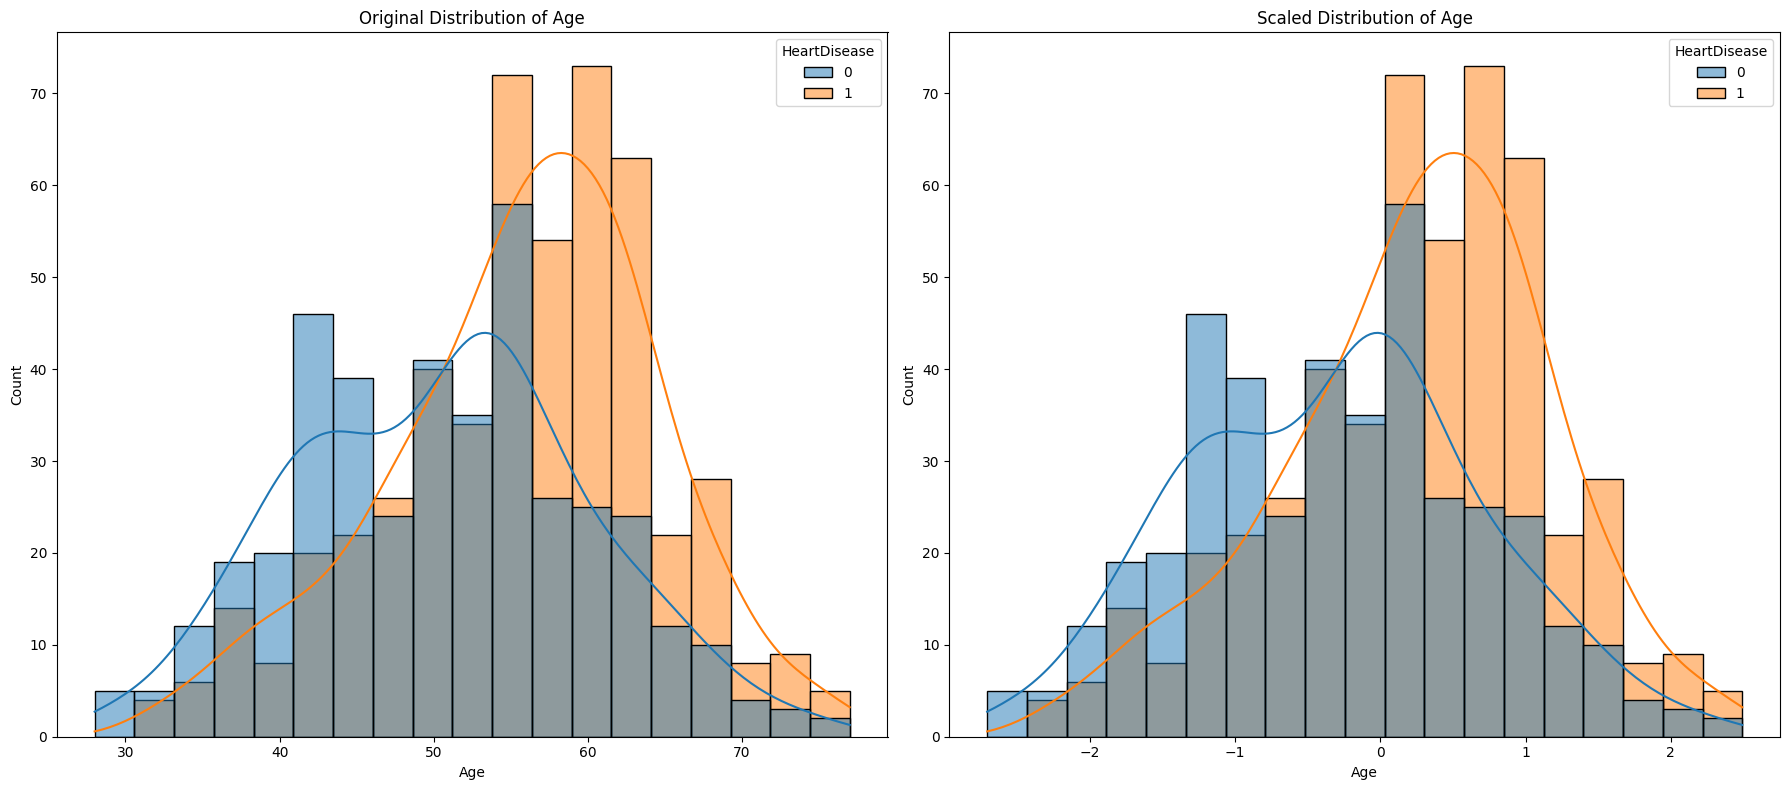

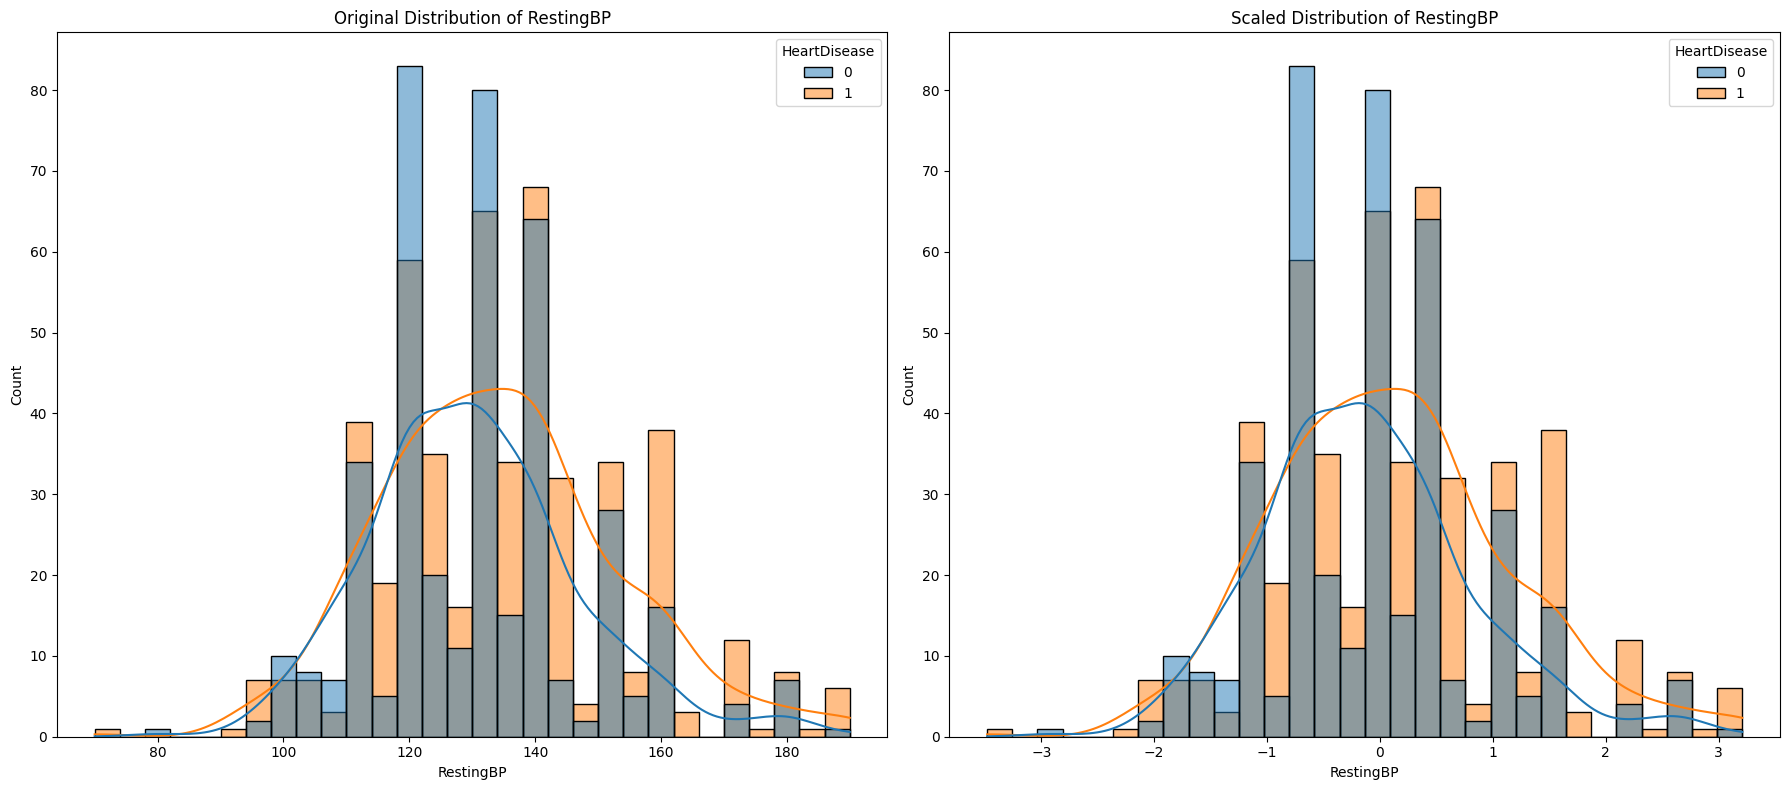

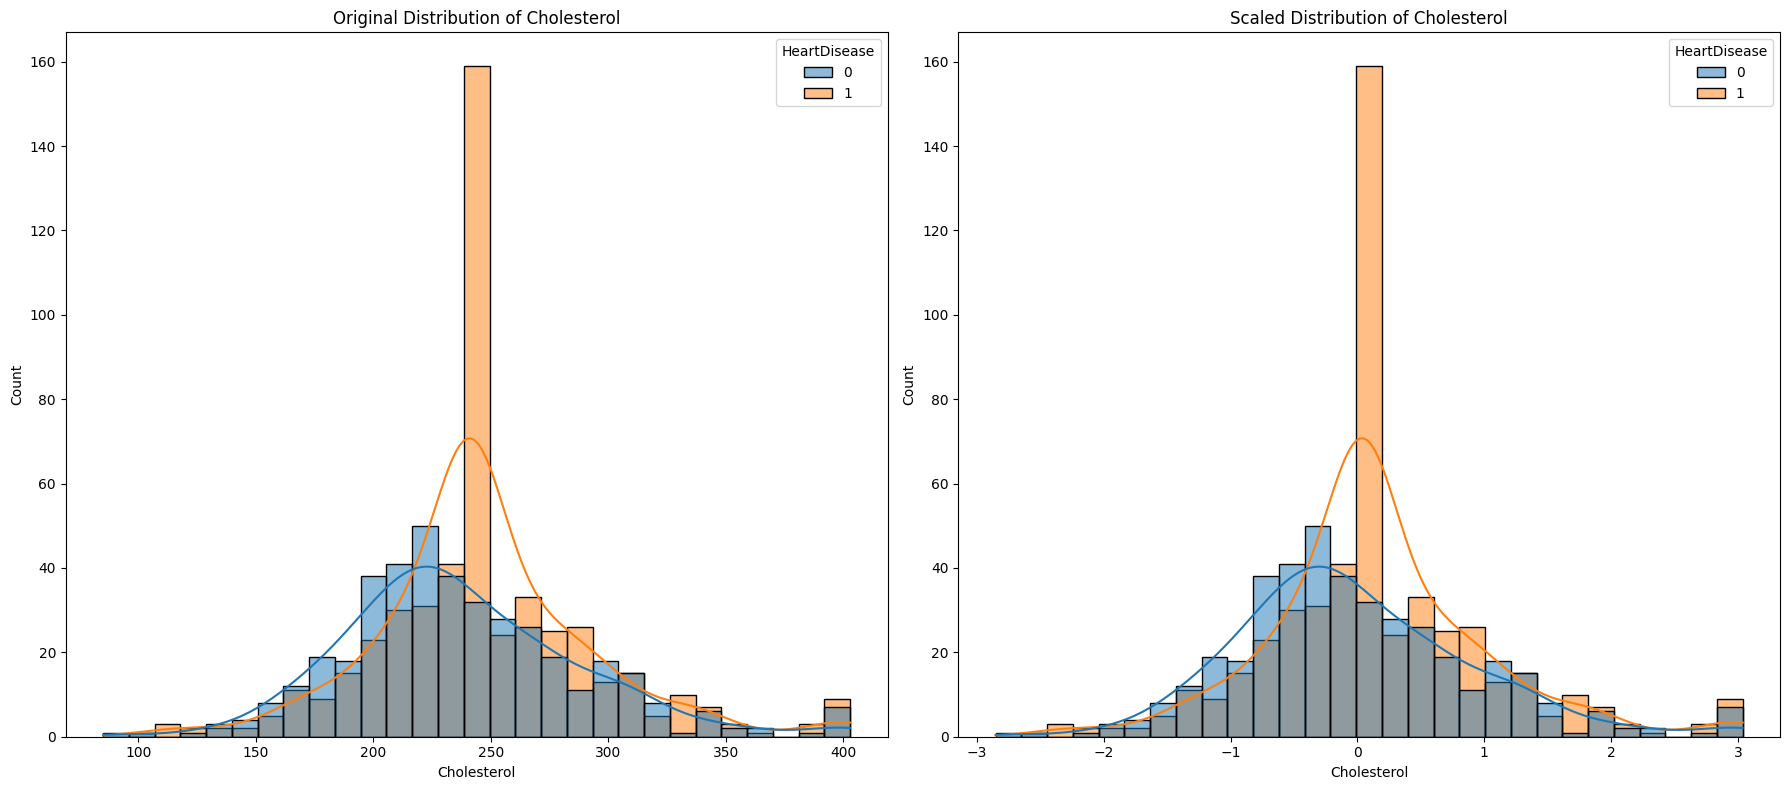

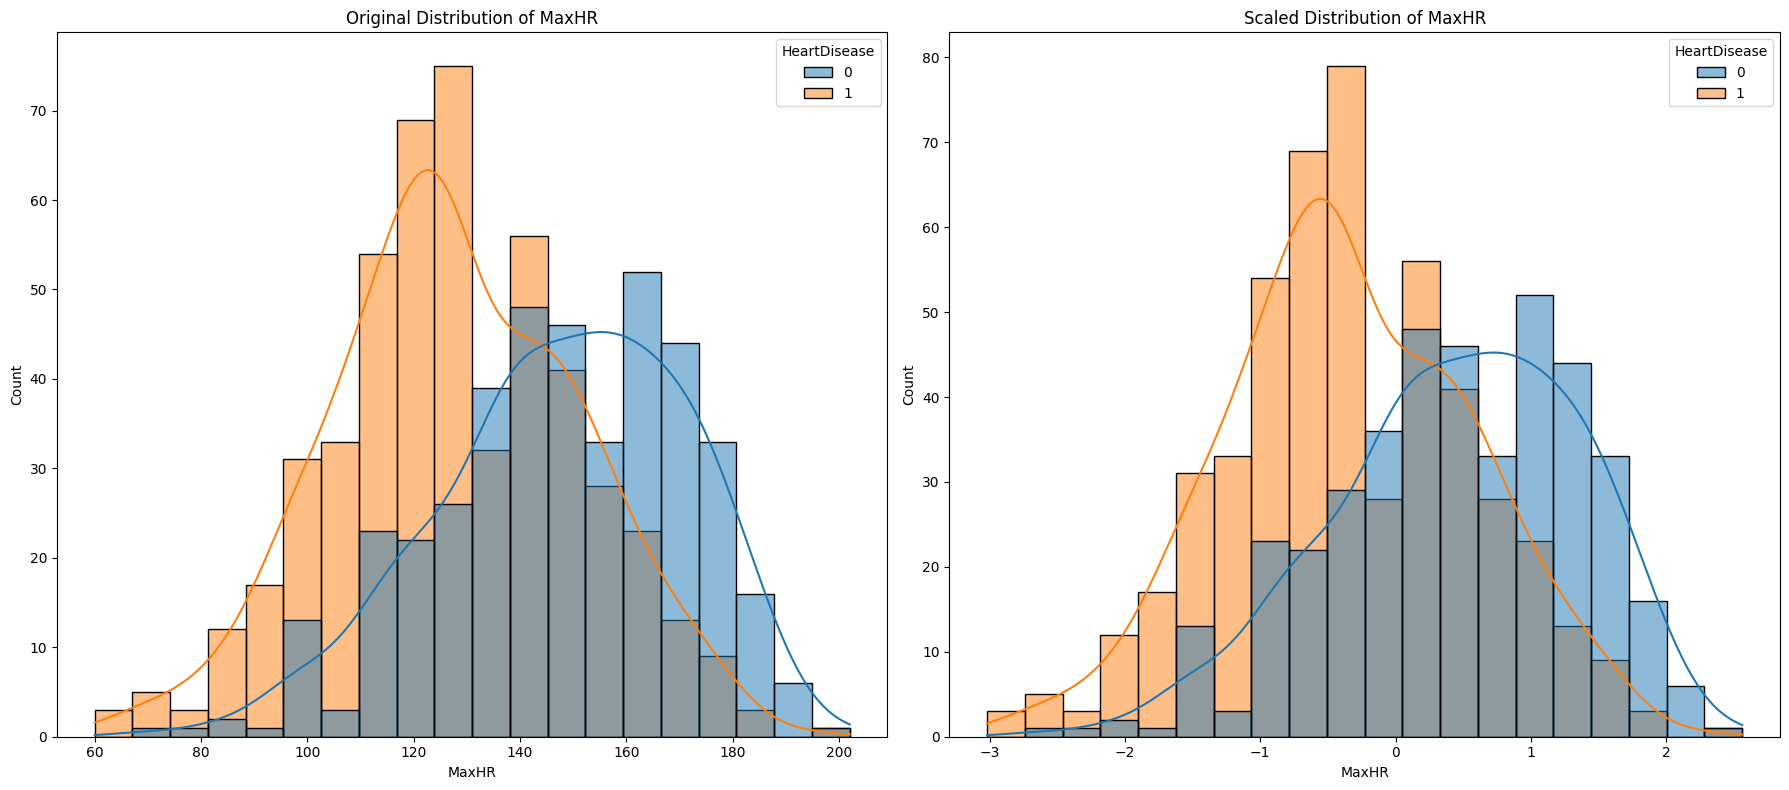

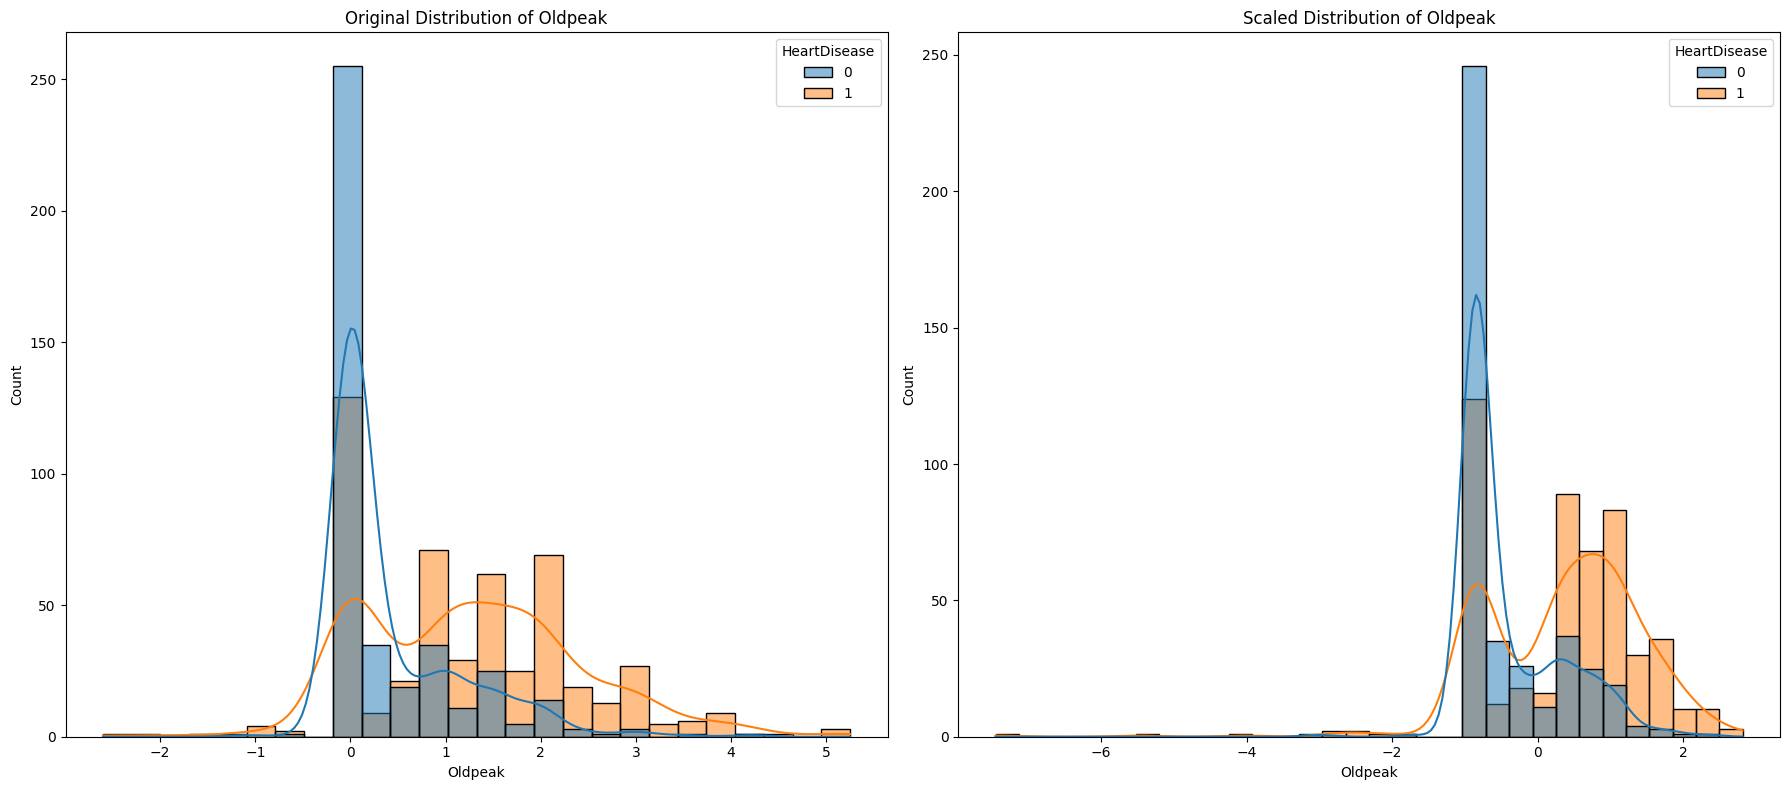

In [154]:
visualize_scaling_comparison(df_no_outliers_encoded, scaled_df)

Penjelasan Rekomendasi Feature Scaling

Setiap fitur dalam dataset memiliki karakteristik distribusi yang berbeda, sehingga pendekatan individual bisa lebih optimal:
Age (Usia)

Rekomendasi: StandardScaler
Alasan: Distribusi cukup simetris meski bimodal, dan StandardScaler akan mempertahankan perbedaan penting antara kelompok dengan dan tanpa penyakit jantung.
Hasil setelah scaling: Mean akan 0 dan std 1, sehingga nilai negatif untuk usia di bawah rata-rata dan positif untuk di atas rata-rata.

RestingBP (Tekanan Darah Istirahat)

Rekomendasi: StandardScaler
Alasan: Distribusi relatif simetris dengan kisaran nilai cukup lebar. Standardisasi akan membantu model fokus pada deviasi dari mean.
Nilai tinggi (outlier) pada tekanan darah dipertahankan sebagai sinyal penting.

Cholesterol (Kolesterol)

Rekomendasi: RobustScaler
Alasan: Adanya spike besar pada nilai tertentu yang bisa dianggap sebagai outlier. RobustScaler menggunakan median dan IQR yang lebih tahan terhadap outlier.
Scaling ini akan mencegah dominasi nilai kolesterol yang ekstrem terhadap model.

MaxHR (Detak Jantung Maksimum)

Rekomendasi: StandardScaler
Alasan: Distribusi bimodal yang jelas antara dua kelompok, yang merupakan sinyal prediktif penting.
Standardisasi mempertahankan perbedaan distribusi ini sambil menyeragamkan skala.

Oldpeak

Rekomendasi: PowerTransformer (Yeo-Johnson)
Alasan: Distribusi sangat skewed dengan banyak nilai 0 dan beberapa nilai ekstrem positif dan nilai negatif.
Power transformation akan membantu membuat distribusi lebih mendekati normal.
Transformasi ini sangat berguna untuk fitur yang memiliki distribusi sangat berbeda dari distribusi normal.
